In [1]:
# Multimedia and ML Project - Car Detection 
# Courtesy: Kaggle for Car Detection Dataset & https://github.com/himanshurawlani for Visualizing of Layer Output
# Roshni V, B.Tech CSE (CYS)
# Mentored and Guided by: Ramaguru Radhakrishnan, Assistant Professor, Sr. Gr.
# TIFAC-CORE in Cyber Security, Amrita Vishwa Vidyapeetham, Coimbatore


import numpy as np  # Importing the numpy library and assigning it the alias "np"
import pandas as pd  # Importing the pandas library and assigning it the alias "pd"

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os  # Importing the os module for interacting with the operating system

# Dataset path
dataset_path = "C:\\Users\\roshn\\OneDrive\\Desktop\\Multimedia Processing\\Project\\Images\\Car_Damage_Dataset"

# Traversing the specified directory and listing all files under it
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        # Uncomment the following line to print the absolute path of each file
        # print(os.path.join(dirname, filename))
        pass



# **MobileNet**

In [2]:
!pip install --upgrade imutils
!pip install tensorflow

In [3]:
%load_ext tensorboard

[INFO] loading images...
[INFO] compiling model...
[INFO] training head...
Epoch 1/100
28/28 [==============================] - 79s 3s/step - loss: 2.5818 - accuracy: 0.5141 - val_loss: 1.3071 - val_accuracy: 0.5370
Epoch 2/100
28/28 [==============================] - 71s 3s/step - loss: 2.2196 - accuracy: 0.5253 - val_loss: 1.0514 - val_accuracy: 0.5565
Epoch 3/100
28/28 [==============================] - 71s 3s/step - loss: 1.9461 - accuracy: 0.5462 - val_loss: 0.9629 - val_accuracy: 0.5870
Epoch 4/100
28/28 [==============================] - 77s 3s/step - loss: 1.7153 - accuracy: 0.5749 - val_loss: 0.9007 - val_accuracy: 0.6217
Epoch 5/100
28/28 [==============================] - 72s 3s/step - loss: 1.6243 - accuracy: 0.5935 - val_loss: 0.8500 - val_accuracy: 0.6522
Epoch 6/100
28/28 [==============================] - 73s 3s/step - loss: 1.5067 - accuracy: 0.5965 - val_loss: 0.8091 - val_accuracy: 0.6870
Epoch 7/100
28/28 [==============================] - 74s 3s/step - loss: 1.4206

28/28 [==============================] - 73s 3s/step - loss: 0.5673 - accuracy: 0.7667 - val_loss: 0.5247 - val_accuracy: 0.7935
Epoch 58/100
28/28 [==============================] - 71s 3s/step - loss: 0.5671 - accuracy: 0.7708 - val_loss: 0.5228 - val_accuracy: 0.7957
Epoch 59/100
28/28 [==============================] - 72s 3s/step - loss: 0.5651 - accuracy: 0.7776 - val_loss: 0.5222 - val_accuracy: 0.7957
Epoch 60/100
28/28 [==============================] - 74s 3s/step - loss: 0.5870 - accuracy: 0.7635 - val_loss: 0.5219 - val_accuracy: 0.7935
Epoch 61/100
28/28 [==============================] - 78s 3s/step - loss: 0.5510 - accuracy: 0.7652 - val_loss: 0.5222 - val_accuracy: 0.7935
Epoch 62/100
28/28 [==============================] - 74s 3s/step - loss: 0.5966 - accuracy: 0.7539 - val_loss: 0.5219 - val_accuracy: 0.7935
Epoch 63/100
28/28 [==============================] - 73s 3s/step - loss: 0.5561 - accuracy: 0.7686 - val_loss: 0.5215 - val_accuracy: 0.7935
Epoch 64/100
28/28 

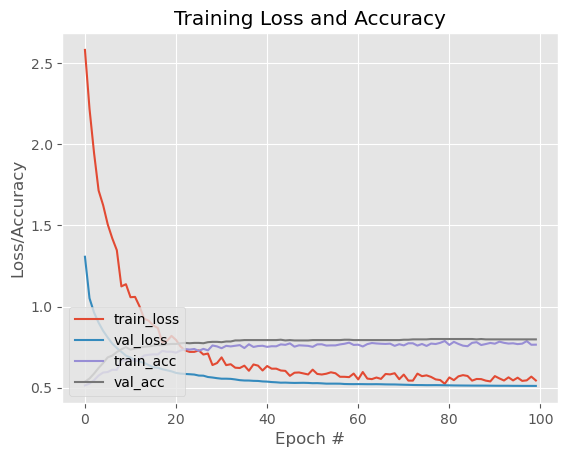

In [4]:
# import the necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-5
EPOCHS = 100
BS = 64

DIRECTORY = dataset_path + "\\training\\"
DIRECTORY2 = dataset_path + "\\validation\\"
CATEGORIES = ["00-damage", "01-whole"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

for category in CATEGORIES:
    path = os.path.join(DIRECTORY2, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

# compile our model
print("[INFO] compiling model...")
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=10000,
    decay_rate=INIT_LR / EPOCHS
)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS,
    callbacks=[tensorboard_callback]
)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set, find the index of the label with the
# corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("MobileNet_Car_detection_epoch100_.model", save_format="h5")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("MobileNet.png")

In [5]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3824), started 3 days, 23:07:23 ago. (Use '!kill 3824' to kill it.)

In [6]:
# compile our model
opt = tf.keras.optimizers.Adam()  # Create an Adam optimizer object
loss = tf.keras.losses.CategoricalCrossentropy()  # Create a categorical cross-entropy loss object
metrics = [tf.keras.metrics.Accuracy()]  # Create a list of metrics objects

model.compile(optimizer=opt, loss=loss, metrics=metrics)

## Loading Model for Visulation at Each Layer

In [7]:
from keras import models

# Load the pre-trained model
MobileNet = models.load_model("MobileNet_Car_detection_epoch100_.model")

# Assign the loaded model to the 'model' variable
model = MobileNet

# Display the summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [3]:
from keras.preprocessing import image
import keras.utils as image
import numpy as np

img_path = dataset_path + "\\validation\\00-damage\\0061.JPEG"

# Load the image and resize it to the target size
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Expand the dimensions of the image array to make it compatible with the model
img_tensor = np.expand_dims(img_array, axis=0)

# Normalize the image tensor by dividing by 255.0
img_tensor /= 255.0

# Print the shape of the image tensor
print(img_tensor.shape)


(1, 224, 224, 3)


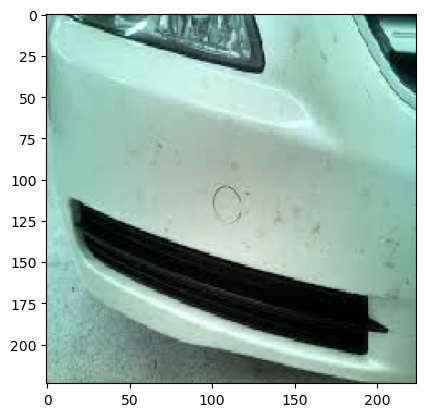

In [4]:
import matplotlib.pyplot as plt

# Display the preprocessed image using matplotlib
plt.imshow(img_tensor[0])
plt.show()


In [5]:
from keras import models

# Define the number of layers to extract outputs from
NUM_LAYERS_TO_EXTRACT = 8

# Extract the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[1:NUM_LAYERS_TO_EXTRACT+1]]

# Create a new model that will return the layer outputs given the input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


In [6]:
# Predict the activations of the layers for the input image tensor
activations = activation_model.predict(img_tensor)


1/1 [==============================] - 0s 113ms/step


In [7]:
# Extract the activations of the first layer
first_layer_activation = activations[0]

# Print the shape of the first layer activations
print(first_layer_activation.shape)


(1, 112, 112, 32)


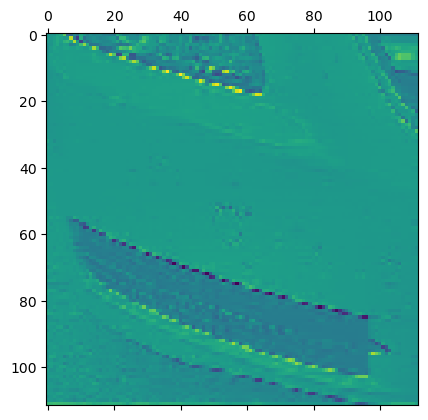

In [8]:
import matplotlib.pyplot as plt

# Visualize the activations of the first layer
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
plt.show()


C:\Users\roshn\AppData\Local\Temp\ipykernel_21484\1734445408.py:29: RuntimeWarning: divide by zero encountered in divide
  channel_image /= channel_image.std()
C:\Users\roshn\AppData\Local\Temp\ipykernel_21484\1734445408.py:29: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


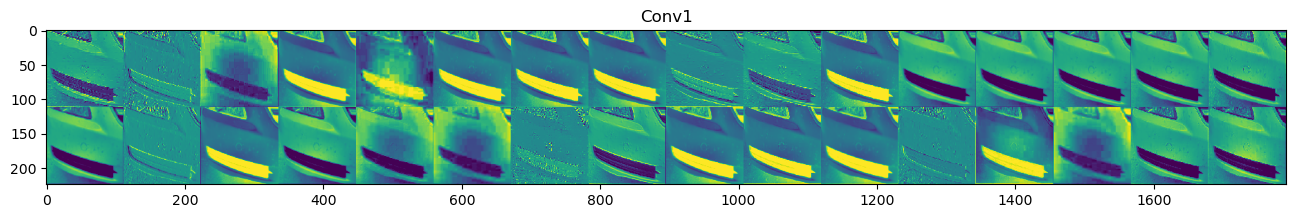

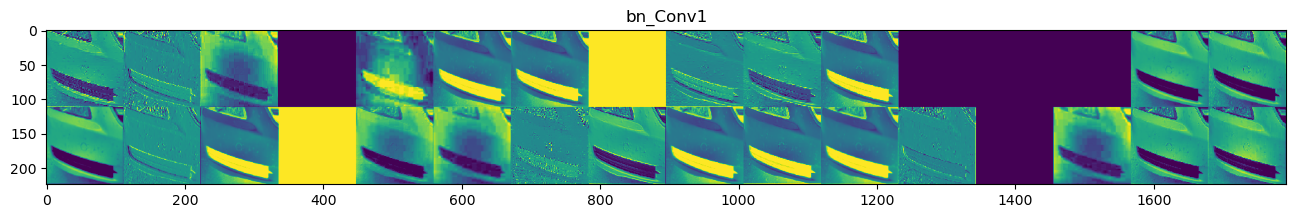

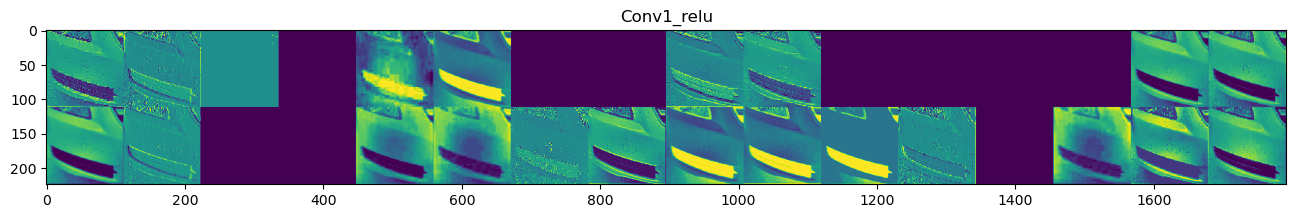

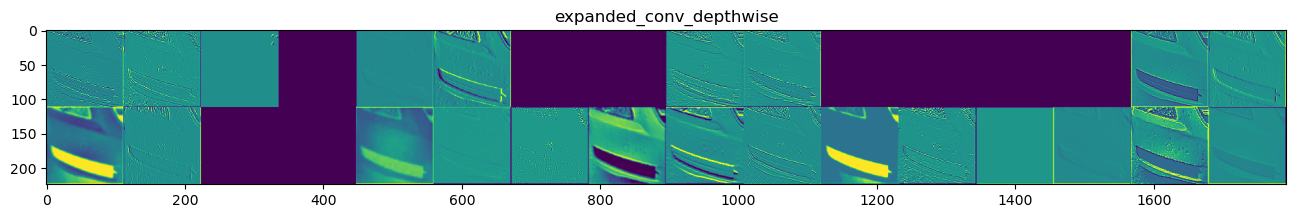

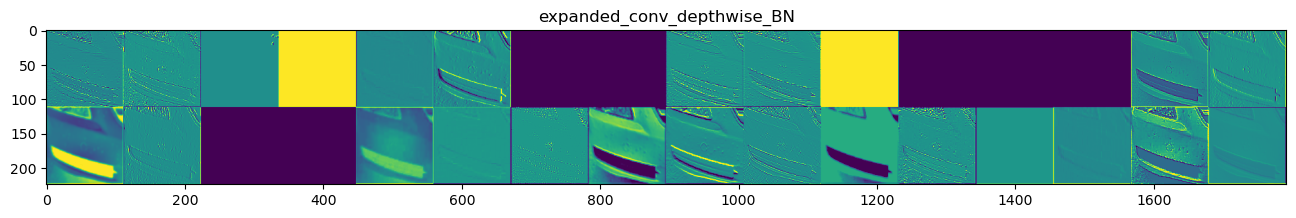

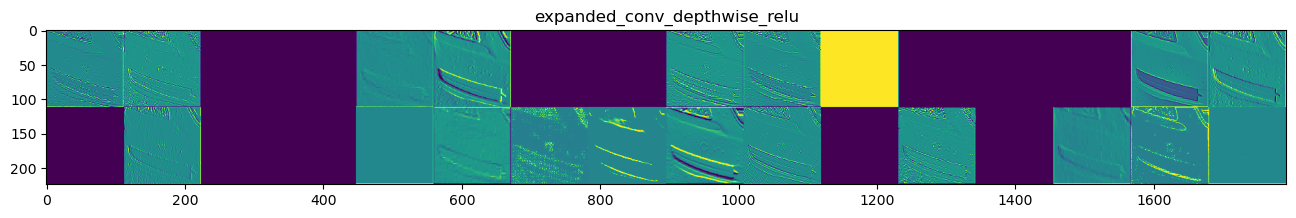

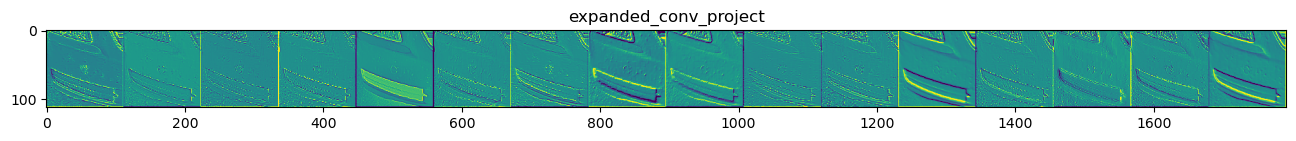

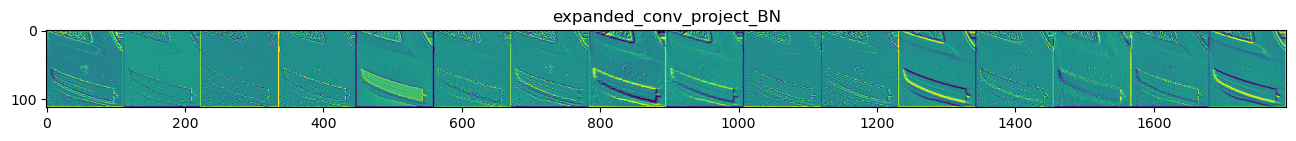

In [9]:
import keras
import numpy as np
import matplotlib.pyplot as plt

# Get the names of the layers in the model
layer_names = [layer.name for layer in model.layers[1:]]

# Define the number of images to display per row
images_per_row = 16

# Visualize the feature maps of each layer
for layer_name, layer_activation in zip(layer_names, activations):
    # Get the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # Get the size of the feature map
    size = layer_activation.shape[1]

    # Create a grid to display the feature maps
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # Tile each filter into the display grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.savefig(layer_name)

plt.show()


In [3]:
import os

# Define the URLs for the test data directories
test_url = dataset_path + "\\validation"
damage_test_url = dataset_path + "\\validation\\00-damage\\"
whole_test_url = dataset_path + "\\validation\\01-whole\\"

# Get the image file paths for the damage and whole categories
damage_img = [os.path.join(damage_test_url, i) for i in os.listdir(damage_test_url)]
whole_img = [os.path.join(whole_test_url, i) for i in os.listdir(whole_test_url)]

# Combine the image file paths into a single list
total_img = damage_img + whole_img



NameError: name 'MobileNet' is not defined

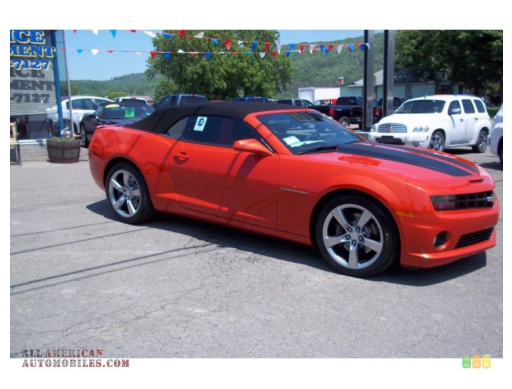

In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the image path
img_path = dataset_path + "\\validation\\01-whole\\0062.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# Load and display the original image using OpenCV and matplotlib
im = cv2.imread(img_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(im)
plt.show()

# Make predictions using the pre-trained model
pred = MobileNet.predict(img_batch)

# Determine if the car is damaged or not based on the predictions
print("Car is Damaged: " + str(pred[0][0]) + ", Car is not Damaged: " + str(pred[0][1]))
if pred[0][0] < pred[0][1]:
    print("The car is not damaged")
else:
    print("The car is damaged")


In [11]:
#!pip install pytorch
from torch.utils.tensorboard import SummaryWriter

In [16]:
writer = SummaryWriter("torchlogs/")
#model = Net()
model = MobileNet
model.summary()
# Create dummy input data
batch_size = 4
channels = 3
height = 224
width = 224
dummy_input = [1,2,3,4]

# Add graph to TensorBoard
writer.add_graph(model)

writer.close()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
open torchlogs folder:

tensorboard --logdir=./